# Unit Testing

Equally important as writing good code is writing good tests. Better to find bugs yourself than have them reported to you by end users!

For this section we'll be working with files outside the notebook. We'll save our code to a .py file, and then save our test script to another .py file. Normally we would code these files using a text editor like Brackets or Atom, or inside an IDE like Spyder or Pycharm. But, since we're here, let's use Jupyter!

Recall that with some IPython magic we can write the contents of a cell to a file using `%%writefile`.<br>
Something we haven't seen yet; you can run terminal commands from a jupyter cell using `!`

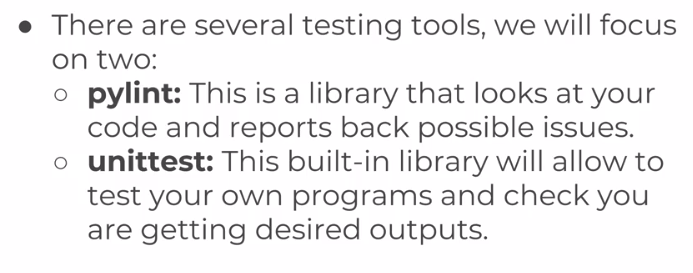

## Testing tools

There are dozens of good testing libraries out there. Most are third-party packages that require an install, such as:

* [pylint](https://www.pylint.org/)
* [pyflakes](https://pypi.python.org/pypi/pyflakes/)
* [pep8](https://pypi.python.org/pypi/pep8)

These are simple tools that merely look at your code, and they'll tell you if there are style issues or simple problems like variable names being called before assignment.

A far better way to test your code is to write tests that send sample data to your program, and compare what's returned to a desired outcome.<br>Two such tools are available from the standard library:

* [unittest](https://docs.python.org/3/library/unittest.html)
* [doctest](https://docs.python.org/3/library/doctest.html)

Let's look at pylint first, then we'll do some heavier lifting with unittest.


## `pylint`

`pylint` tests for style as well as some very basic program logic.

First, if you don't have it already (and you probably do, as it's part of the Anaconda distribution), you should install `pylint`.Tushar you already have this library. Check package in anaconda navigator.<br>Once that's done feel free to comment out the cell, you won't need it anymore.

In [ ]:
! pip install pylint

Let's save a very simple script:

In [1]:
%%writefile simple1.py
a = 1
b = 2
print(a)
print(B)

Overwriting simple1.py


Now let's check it using pylint

In [4]:
! pylint simple1.py

************* Module simple1
simple1.py:1:0: C0111: Missing module docstring (missing-docstring)
simple1.py:1:0: C0103: Constant name "a" doesn't conform to UPPER_CASE naming style (invalid-name)
simple1.py:2:0: C0103: Constant name "b" doesn't conform to UPPER_CASE naming style (invalid-name)
simple1.py:4:6: E0602: Undefined variable 'B' (undefined-variable)

----------------------------------------------------------------------
Your code has been rated at -10.00/10 (previous run: -10.00/10, +0.00)



# Tushar sublime is much better FOR TESTING CODE.
you can also test code in sublime text editor. For that see this video:

https://www.udemy.com/complete-python-bootcamp/learn/lecture/9478414#questions


Pylint first lists some styling issues - it would like to see an extra newline at the end, modules and function definitions should have descriptive docstrings, and single characters are a poor choice for variable names.

More importantly, however, pylint identified an error in the program - a variable called before assignment. This needs fixing.

Note that pylint scored our program a negative 12.5 out of 10. Let's try to improve that!

In [5]:
%%writefile simple1.py
"""
A very simple script.
"""

def myfunc():
    """
    An extremely simple function.
    """
    first = 1
    second = 2
    print(first)
    print(second)

myfunc()

Overwriting simple1.py


In [6]:
! pylint simple1.py


----------------------------------------------------------------------
Your code has been rated at 10.00/10 (previous run: -10.00/10, +20.00)



Much better! Our score climbed to 8.33 out of 10. Unfortunately, the final newline has to do with how jupyter writes to a file, and there's not much we can do about that here. Still, pylint helped us troubleshoot some of our problems. But what if the problem was more complex?

In [7]:
%%writefile simple2.py
"""
A very simple script.
"""

def myfunc():
    """
    An extremely simple function.
    """
    first = 1
    second = 2
    print(first)
    print('second')

myfunc()

Overwriting simple2.py


In [8]:
! pylint simple2.py

************* Module simple2
simple2.py:10:4: W0612: Unused variable 'second' (unused-variable)

-----------------------------------
Your code has been rated at 8.33/10



pylint tells us there's an unused variable in line 10, but it doesn't know that we might get an unexpected output from line 12! For this we need a more robust set of tools. That's where `unittest` comes in.

## `unittest`
watch this video to learn unittesting in sublime:

https://www.udemy.com/complete-python-bootcamp/learn/lecture/9478416#questions

`unittest` lets you write your own test programs. The goal is to send a specific set of data to your program, and analyze the returned results against an expected result. 

Let's generate a simple script that capitalizes words in a given string. We'll call it **cap.py**.

In [7]:
%%writefile cap.py
def cap_text(text):
    return text.capitalize()

Overwriting cap.py


Now we'll write a test script. We can call it whatever we want, but **test_cap.py** seems an obvious choice.

When writing test functions, it's best to go from simple to complex, as each function will be run in order. Here we'll test simple, one-word strings, followed by a test of multiple word strings.

In [8]:
%%writefile test_cap.py
import unittest
import cap

class TestCap(unittest.TestCase):
    
    def test_one_word(self):
        text = 'python'
        result = cap.cap_text(text)
        self.assertEqual(result, 'Python')
        
    def test_multiple_words(self):
        text = 'monty python'
        result = cap.cap_text(text)
        self.assertEqual(result, 'Monty Python')
        
if __name__ == '__main__':
    unittest.main()

Overwriting test_cap.py


In [9]:
! python test_cap.py

F.
FAIL: test_multiple_words (__main__.TestCap)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "test_cap.py", line 14, in test_multiple_words
    self.assertEqual(result, 'Monty Python')
AssertionError: 'Monty python' != 'Monty Python'
- Monty python
?       ^
+ Monty Python
?       ^


----------------------------------------------------------------------
Ran 2 tests in 0.000s

FAILED (failures=1)


What happened? It turns out that the `.capitalize()` method only capitalizes the first letter of the first word in a string. Doing a little research on string methods, we find that `.title()` might give us what we want.

In [10]:
%%writefile cap.py
def cap_text(text):
    return text.title()  # replace .capitalize() with .title()

Overwriting cap.py


In [11]:
! python test_cap.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.000s

OK


Hey, it passed! But have we tested all cases? Let's add another test to **test_cap.py** to see if it handles words with apostrophes, like *don't*.

In a text editor this would be easy, but in Jupyter we have to start from scratch.

In [12]:
%%writefile test_cap.py
import unittest
import cap

class TestCap(unittest.TestCase):
    
    def test_one_word(self):
        text = 'python'
        result = cap.cap_text(text)
        self.assertEqual(result, 'Python')
        
    def test_multiple_words(self):
        text = 'monty python'
        result = cap.cap_text(text)
        self.assertEqual(result, 'Monty Python')
        
    def test_with_apostrophes(self):
        text = "monty python's flying circus"
        result = cap.cap_text(text)
        self.assertEqual(result, "Monty Python's Flying Circus")
        
if __name__ == '__main__':
    unittest.main()

Overwriting test_cap.py


In [13]:
! python test_cap.py

..F
FAIL: test_with_apostrophes (__main__.TestCap)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "test_cap.py", line 19, in test_with_apostrophes
    self.assertEqual(result, "Monty Python's Flying Circus")
AssertionError: "Monty Python'S Flying Circus" != "Monty Python's Flying Circus"
- Monty Python'S Flying Circus
?              ^
+ Monty Python's Flying Circus
?              ^


----------------------------------------------------------------------
Ran 3 tests in 0.000s

FAILED (failures=1)


Now we have to find a solution that handles apostrophes! There is one (look up `capwords` from the `string` module) but we'll leave that as an exercise for the reader.

Great! Now you should have a basic understanding of unit testing!